<a href="https://colab.research.google.com/github/ricardo-casa/ReconocimientoPatrones/blob/main/ReconocimientoPatrones/Practicas/Practica1/practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.colors as colors
import skimage as sk
import imghdr 

EJERCICIOS PARTE A

In [ ]:
'''
4.1
Desarrolla un script para leer y desplegar cada imagen con los paquetes de Matplotlib, OpenCV, Scikit-
Image y PIL.
'''

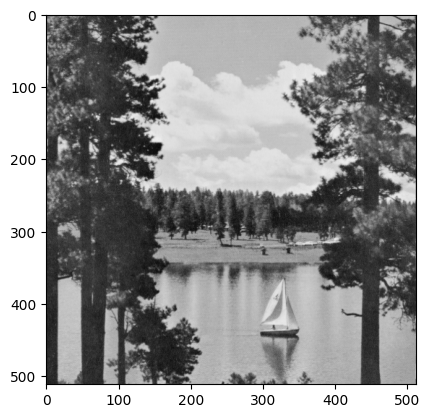

In [ ]:
origin = 'Imagenes/lake.tif'
#matplotlib
image = img.imread(origin)
plt.imshow(image)
plt.show()
del image

In [ ]:
#PIL
image = Image.open(origin)
image.show()
del image

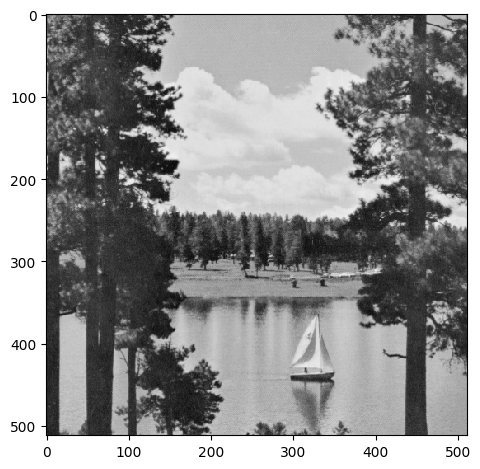

In [ ]:
#scikit-image
image = sk.io.imread(origin, as_gray=True, plugin='pil')
sk.io.imshow(image)
sk.io.show()
del image

In [ ]:
#OpenCV 
image = cv2.imread(origin)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
'''4.2 Imprimir el tipo de imagen, el tamaño y el tipo de dato'''

In [ ]:
'''Utilizando como ejemplo el caso de OPEN_CV ya que el procedimiento es el mismo para todos)'''

image_format = imghdr.what(origin)
size = image.shape[:2] #ignorar el tercer componente del canal de color
dtype = image.dtype

print(f'formato de imagen: {image_format}, tamaño: {size}, tipo de dato: {dtype}')
del image

formato de imagen: tiff, tamaño: (512, 512), tipo de dato: uint8


In [ ]:
'''
4.3 De las imágenes “lena_color_512.tif”, “peppers_color.tif”. Desarrolla un script con OpenCV y Scikit-
Image para cambiar el espacio de color de:

4.3.1 RGB a Escala de grises
4.3.2 RGB a YUV
4.3.3 RGB a HSV
'''

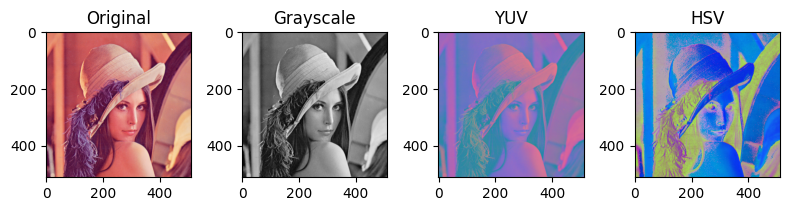

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


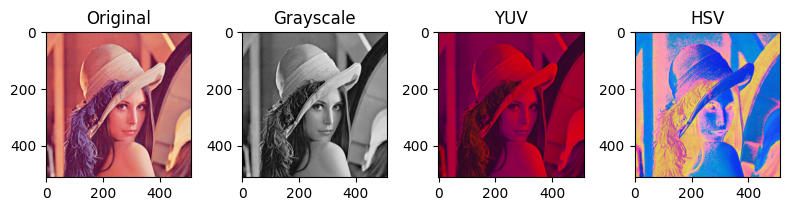

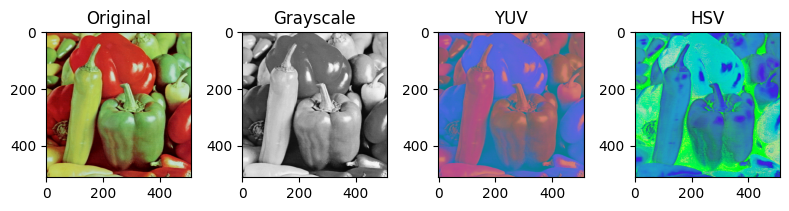

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


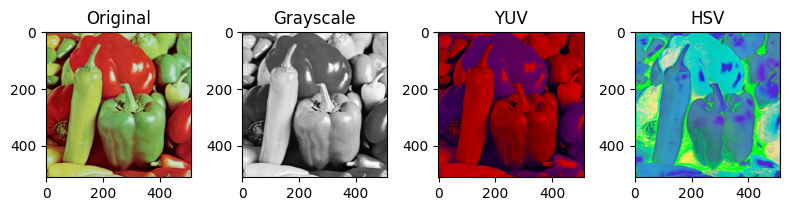

In [ ]:
import numpy as np

def use_opencv(filename):
    dict = {}
    image = cv2.imread(filename)
    dict['ORIGINAL'] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dict['RGB2GRAY'] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dict['RGB2YUV'] = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    dict['RGB2HSV'] = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    del image
    return dict

def use_skimage(filename):
    dict = {}
    image = sk.io.imread(filename, plugin='pil')[:,:,:3]
    dict['ORIGINAL'] = image
    dict['RGB2GRAY'] = sk.color.rgb2gray(image)
    dict['RGB2YUV'] = sk.color.rgb2yuv(image)
    dict['RGB2HSV'] = sk.color.rgb2hsv(image)
    del image
    return dict

def show(dict):
    fig, axes = plt.subplots(1, 4, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].imshow(dict['ORIGINAL'])
    ax[0].set_title("Original")
    ax[1].imshow(dict['RGB2GRAY'], cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    ax[2].imshow(dict['RGB2YUV'])
    ax[2].set_title("YUV")
    ax[3].imshow(dict['RGB2HSV'], cmap=plt.cm.hsv)
    ax[3].set_title("HSV")

    fig.tight_layout()
    plt.show()


origin1 = 'Imagenes/lena_color_512.tif'
origin2 = 'Imagenes/peppers_color.tif'

a = use_opencv(origin1)
b = use_skimage(origin1)
c = use_opencv(origin2)
d = use_skimage(origin2)


show(a)
show(b)
show(c)
show(d)

In [ ]:
'''4.4 Despliega la paleta de colores de RGB por separado, ver figura siguiente, la barra de la derecha con
valores es la paleta de colores.'''

In [ ]:
'''
4.5 De una imagen que usted escoja, dejarla en escala de grises y procure que sea igual en renglones y en
columnas. Programe una función que realice decimación de una imagen, reduciendola a la mitad de su
tamaño original. Y promediando en grupos de 4 pixeles. Pruebe con su imagen.
'''

(256, 256)


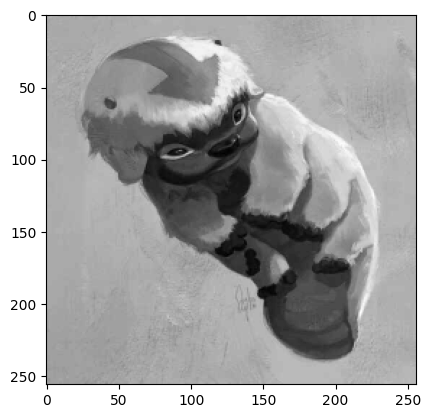

In [ ]:
from statistics import mean
from skimage.util import view_as_blocks


'''El programa redimenciona en menores tamanos con potencias de base 2. Se puede modificar cambiando el factor'''
def decimate(image, factor):  
    resized_image = []
    new_size = len(image)//factor
    
    blocks = view_as_blocks(image,(factor,factor)) #tomar una submatriz de manera consecutiva (horizontal y vertical)

    for a in blocks.reshape(-1, factor**2):
        b = a.reshape(-1) # "aplanar" el vector a analizar
        c = np.around(mean(b)) #promedio de los pixels de la region seleccionada
        resized_image.append(c)
    
    resized_image=np.array(resized_image)
    return resized_image.reshape(new_size,new_size)

image = cv2.imread('Imagenes/apa.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = decimate(image,2)
print(resized.shape)

plt.imshow(resized, cmap = plt.cm.gray)
plt.show()

In [ ]:
'''
4.6 Convierte la imagen peppers_color.tif a escala de grises,
    4.6.1 Recortela de manera que solo quede uno de los pimientos verdes en ese recorte
    4.6.2 Guárdela en formato .jpg.
'''

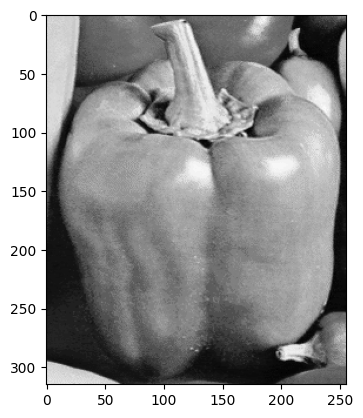

In [ ]:
image = cv2.imread('Imagenes/peppers_color.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped = crop_img = image[178:493, 169:425]
cv2.imwrite('Imagenes/GreenPeppper_cropped.jpg', cropped)
plt.imshow(cropped, cmap = plt.cm.gray)
plt.show()

In [ ]:
'''
4.7.Un formato de imágenes sin ningún tipo de codificación se conoce como formato crudo (RAW). De la
imagen “rosa800x600.raw” lea y despliegue la imagen. Tome en cuenta que esta imagen maneja la
precisión de integer8 y el tamaño es de 600x800 pixeles.
'''

(800, 600)


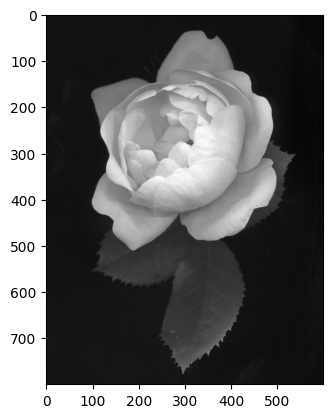

In [ ]:
image = np.fromfile("Imagenes/rosa800x600.raw", dtype='uint8')
image = np.reshape(image, (800, 600))

print(image.shape)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

5. Ejercicios PARTE B Iris Setosa

In [ ]:
import pandas as pd

In [ ]:
'''
5.1.Cargue los datos iris en un data frame (pandas) e imprima la descripción de los datos (columnas y
renglones), tipo y las 10 primeras filas de los datos. Fuente de datos:
https://archive.ics.uci.edu/ml/datasets/Iris.
'''

In [ ]:
df = pd.read_csv('Iris/iris.data', sep=',', header=None) # leer datos como csv y establecer que no tiene nombre de columnas
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
'''5.2 Imprima las llaves y el número de filas y de columnas'''

In [ ]:
print(f'numero de filas: {len(df)}, numero de columnas: {len(df.columns)}')
print(f'\nllaves: {df.keys}')


numero de filas: 150, numero de columnas: 5

llaves: <bound method NDFrame.keys of        0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>


In [ ]:
'''5.3.Obtenga el número de muestras faltantes o Nan.'''

In [ ]:
#NO APLICA PAR AESTE EJERCICIO YA QUE NO HAY COLUMNAS CON NAN

In [ ]:
'''5.4 Cree un arreglo 2-D de tamaño 5x5 con unos en la diagonal y ceros en el resto. Convierta el arreglo NumPy
a una matriz dispersa de ScyPy en formato CRS. Nota: una matriz se considera dispersa cuando el
porcentaje de ceros es mayor a 0.5.'''

In [ ]:
import scipy.sparse as sp

m = np.zeros((5,5), dtype =int)
np.fill_diagonal(m,1)
disperse_matrix = sp.csr_matrix(m).toarray()
print(disperse_matrix)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


In [ ]:
'''5.5 Muestre estadísticas básicas como percentil, media, mínimo, máximo y desviación estándar de los datos.
Use describe para ello. Imprima sólo la media y la desviación estándar.'''

In [ ]:
#percentile
from xml.etree.ElementInclude import include

percentile = df.describe(percentiles=[0.4])

df.describe().loc[['mean','std']]

,0,1,2,3
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161


In [ ]:
'''5.6.Obtenga el número de muestras para cada clase.'''

In [ ]:
from itertools import count


for cat in df[4]: 
    count


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object